In [1]:
import  tensorflow as tf 

# loading the dataset : MINST Data Set
### samples = 60000 , testing samples = 10000

In [3]:
mnist = tf.keras.datasets.mnist

# After loading the minist data , divide into train and test datasets

In [5]:
# unpacking the dataset into  train and test datasets
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

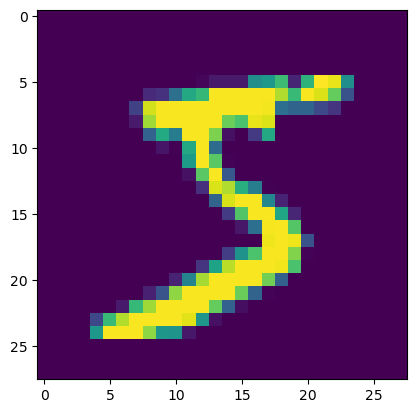

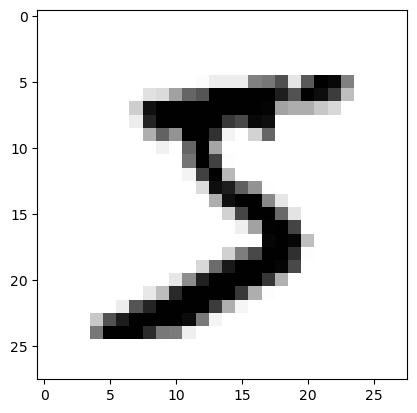

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [8]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# normalizing the data 
### as image are in gray level(1 channel ==> 0 to 255) ,not colored

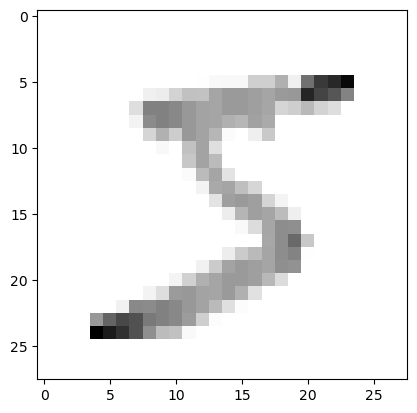

In [10]:
x_train = tf.keras.utils.normalize(x_train , axis =1)
x_test = tf.keras.utils.normalize(x_test , axis =1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [11]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
print(y_train[0])

5


# Resizing image to make it sutable for apply CNN

In [14]:
import numpy as np
IMG_SIZE =28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print('training samples dimension',x_trainr.shape)
print('testing samples dimension',x_testr.shape)


training samples dimension (60000, 28, 28, 1)
testing samples dimension (10000, 28, 28, 1)


# creating a deep neural network 
### training on 60000 samples of mnist handwritten dataset

In [16]:
import cv2


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten,Conv2D,MaxPooling2D

In [18]:
model = Sequential()
# First Convolutional Layer 0 1 2 3 (6000 ,28,28,1)
f = model.add(Conv2D(64,(3,3),input_shape =x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

# Second Convolutional Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

# Third Convolutional Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

# Fully connected Layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

# Fully connected Layer 2
model.add(Dense(32))
model.add(Activation('relu'))

# Fully connected Layer 3
model.add(Dense(10))
model.add(Activation('softmax'))

C:\Users\user2\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
print(len(x_trainr))

60000


In [22]:
model.fit(x_trainr ,y_train,epochs=5,validation_split =0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 88s 63ms/step - accuracy: 0.7598 - loss: 0.7450 - val_accuracy: 0.9571 - val_loss: 0.1404
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 142s 63ms/step - accuracy: 0.9602 - loss: 0.1304 - val_accuracy: 0.9717 - val_loss: 0.0910
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 144s 64ms/step - accuracy: 0.9751 - loss: 0.0818 - val_accuracy: 0.9773 - val_loss: 0.0756
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 136s 60ms/step - accuracy: 0.9808 - loss: 0.0630 - val_accuracy: 0.9752 - val_loss: 0.0876
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 86s 63ms/step - accuracy: 0.9842 - loss: 0.0513 - val_accuracy: 0.9767 - val_loss: 0.0763


In [23]:
##Evaluating on testing data set MNIT
test_loss, test_acc = model.evaluate(x_testr ,y_test)
print('test loss on 10000 test samples',test_loss)
print('validation accuarcy on 10000 test samples',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9722 - loss: 0.0917
test loss on 10000 test samples 0.07757090777158737
validation accuarcy on 10000 test samples 0.9776999950408936


In [24]:
predicions = model.predict([x_testr])

C:\Users\user2\anaconda3\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

C:\Users\user2\anaconda3\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


In [25]:
print(predicions)

[[1.6395405e-09 1.0197664e-06 9.4830447e-08 ... 9.9999392e-01
  1.4163760e-07 2.0268742e-06]
 [1.8027769e-03 3.4461191e-06 9.9622440e-01 ... 8.3391587e-06
  1.4785421e-03 1.5136955e-06]
 [6.0515657e-07 9.9995327e-01 2.6676837e-06 ... 2.1804346e-05
  3.3655195e-07 1.5947234e-06]
 ...
 [5.7142038e-11 8.6032281e-07 2.3024607e-09 ... 5.8106360e-07
  6.3155026e-06 7.0644364e-07]
 [2.1608270e-05 2.1753355e-07 1.6038580e-10 ... 8.6435623e-09
  1.3356502e-04 2.9610925e-07]
 [3.7299184e-04 5.4014730e-09 2.4888453e-05 ... 6.5860752e-09
  2.6230849e-05 2.4797785e-07]]


In [26]:
print(np.argmax(predicions[6]))

4


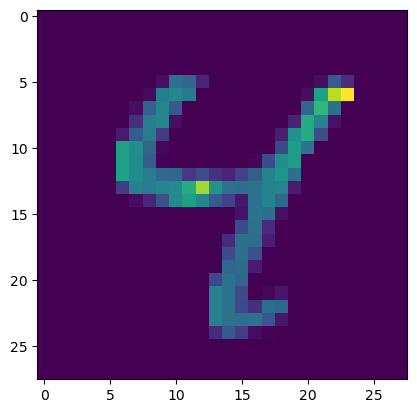

In [27]:
plt.imshow(x_test[6])

In [53]:
img = cv2.imread('SIX.png')

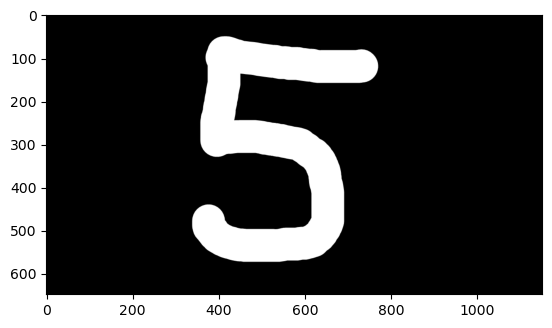

In [55]:
plt.imshow(img)

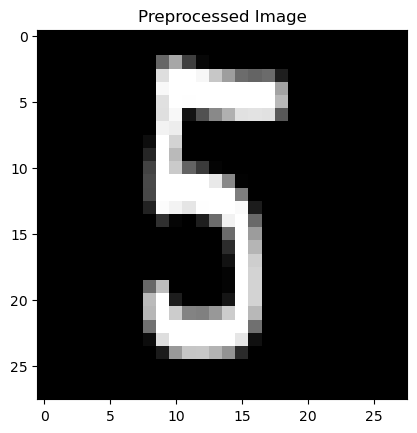

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicted Label: 5


In [57]:
img = cv2.imread('SIX.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Invert colors - important!
#gray = cv2.bitwise_not(gray)

# Resize to 28x28
resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

# Normalize to [0, 1]
resized = resized / 255.0

# Reshape for the model
newimg = resized.reshape(1, 28, 28, 1)

# Optional: Show the final image that is passed into the model
plt.imshow(resized, cmap='gray')
plt.title("Preprocessed Image")
plt.show()

# Predict
predictions = model.predict(newimg)
print("Predicted Label:", np.argmax(predictions))